<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/letter_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection  import chi2, SelectKBest,mutual_info_classif,SelectPercentile,f_classif
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv("/content/letter-recognition.csv")
df['letter'] = LabelEncoder().fit_transform(df['letter'])

In [39]:
X = df.drop(['letter'],axis =1)
y = df['letter']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

[ 1580.694   129.155  2211.991   243.148  3334.956  3618.95   8573.86
 10633.743 10616.813  4550.39  13050.963  5830.937 20533.825  3066.217
 15886.779  1756.357]


Text(0, 0.5, 'Features name')

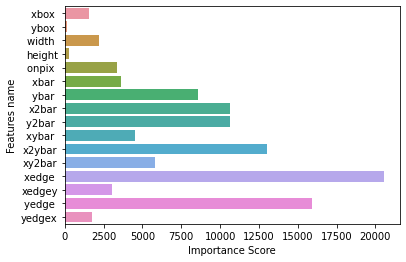

In [15]:
test = SelectKBest(score_func=chi2, k=len(X.columns)).fit(X,y)
np.set_printoptions(precision=3)
score  =  test.scores_
print(score)
Y = X.columns
sns.barplot(x  = score,y = Y )
plt.xlabel('Importance Score')
plt.ylabel('Features name')

In [16]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [17]:
rf.feature_importances_

array([0.022, 0.025, 0.022, 0.02 , 0.026, 0.051, 0.069, 0.085, 0.092,
       0.074, 0.082, 0.085, 0.116, 0.073, 0.102, 0.055])

Text(0.5, 0, 'Feature Importance')

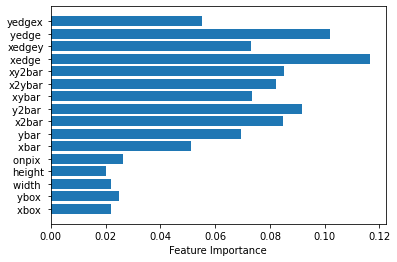

In [18]:
sort = rf.feature_importances_
plt.barh(X.columns, rf.feature_importances_)
plt.xlabel("Feature Importance")

Text(0.5, 0, 'Feature Importance MEAN')

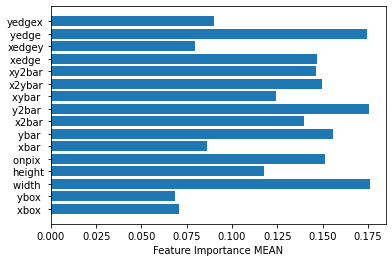

In [19]:
clf = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)
result = permutation_importance(clf, X, y, n_repeats=10, random_state=0)
plt.barh(X.columns, result.importances_mean )
plt.xlabel("Feature Importance MEAN")

Text(0.5, 0, 'Feature Importance STD')

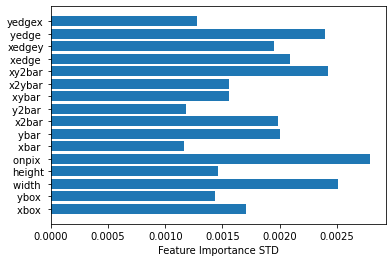

In [20]:
plt.barh(X.columns, result.importances_std)
plt.xlabel("Feature Importance STD")

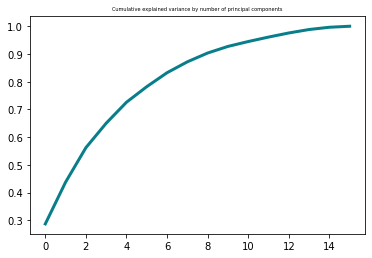

In [21]:
pca = PCA().fit(X_train)
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=5)
plt.show()

In [22]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X.columns) + 1)],
    index=X.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
xbox,1.659998,0.307547,0.045784,-0.046470,0.095956,-0.021139,-0.026350,-0.377820,-0.086754,-0.268714,-0.315693,0.212143,0.163029,-0.523234,0.136780,0.350780
ybox,2.968576,0.233917,-0.410068,0.030798,1.060918,0.108624,0.328258,0.471235,-0.024994,0.035482,-0.423090,-0.373666,0.044482,0.176353,-0.250915,-0.055285
width,1.740992,0.251936,0.024450,-0.235253,-0.225961,-0.251998,-0.004973,-0.463804,0.112513,-0.297025,0.208508,0.310987,-0.010868,-0.444131,-0.151201,-0.359629
height,1.949541,0.085555,0.043497,0.293280,0.467560,0.100530,0.196002,0.467640,0.069143,0.231913,0.566659,0.204993,-0.130684,0.085049,0.547347,-0.012535
onpix,1.790211,-0.123795,0.364041,-0.096006,-0.820198,-0.111289,-0.091439,-0.134291,-0.009776,0.155049,0.542684,0.188413,-0.135892,0.310975,-0.426882,0.209396


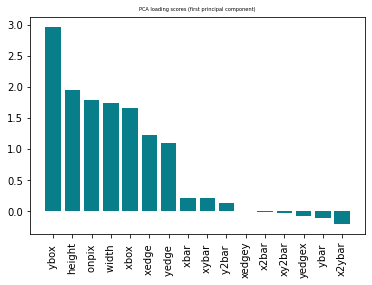

In [23]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=5)
plt.xticks(rotation='vertical')
plt.show()

In [24]:
fs_fit_fscore = SelectKBest(f_classif, k=len(X.columns))
fs_fit_fscore.fit_transform(X_train, y_train)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:len(X.columns)]
fs_indices_fscore

array([10,  6, 12, 13, 11,  8, 14,  7,  5,  9, 15,  2,  4,  0,  3,  1])

In [25]:
best_features_fscore = df.columns[fs_indices_fscore].values
print(best_features_fscore)
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
print(feature_importances_fscore)

['xybar ' 'xbar ' 'xy2bar' 'xedge ' 'x2ybar' 'x2bar' 'xedgey' 'ybar '
 'onpix ' 'y2bar ' 'yedge ' 'ybox ' 'height' 'letter' 'width ' 'xbox ']
[1100.119 1046.081  965.921  843.154  812.94   669.379  571.633  364.067
  315.244  309.695  255.708  118.972   97.626   70.487    9.491    3.348]


Text(0, 0.5, 'Features')

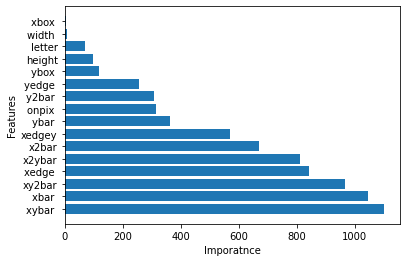

In [26]:
plt.barh(best_features_fscore, feature_importances_fscore)
plt.xlabel('Imporatnce')
plt.ylabel('Features')

In [27]:
fs_fit_mutual_info = SelectKBest(mutual_info_classif, k=len(X.columns))
fs_fit_mutual_info.fit_transform(X_train, y_train)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:len(X.columns)]
best_features_mutual_info = df.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['xy2bar', 'xybar ', 'xedge ', 'xbar ', 'xedgey', 'x2ybar', 'x2bar',
       'ybar ', 'y2bar ', 'onpix ', 'yedge ', 'ybox ', 'height', 'letter',
       'width ', 'xbox '], dtype=object)

In [28]:
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.617, 0.583, 0.552, 0.549, 0.53 , 0.518, 0.495, 0.458, 0.406,
       0.334, 0.265, 0.108, 0.091, 0.063, 0.02 , 0.008])

Text(0, 0.5, 'Features')

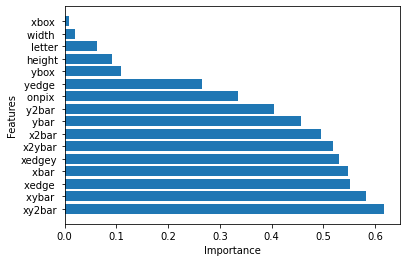

In [29]:
plt.barh(best_features_mutual_info,feature_importances_mutual_info)
plt.xlabel('Importance')
plt.ylabel('Features')

In [40]:
df_corr = df.corr()
df_corr

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,1.000000,0.105349,0.001547,0.096817,0.041672,-0.002665,-0.049637,0.308919,-0.109954,0.012275,-0.077303,0.389421,-0.140922,0.095885,0.336885,-0.056578,-0.183466
xbox,0.105349,1.000000,0.757793,0.851514,0.672764,0.619097,-0.032595,0.045545,0.014306,0.052086,0.148056,0.035464,-0.046333,0.489155,0.098180,0.273504,-0.105147
ybox,0.001547,0.757793,1.000000,0.671912,0.823207,0.555067,0.045690,-0.040925,-0.025019,0.096478,0.159954,-0.054648,-0.007568,0.274431,-0.001336,0.230883,-0.042741
width,0.096817,0.851514,0.671912,1.000000,0.660215,0.765716,0.061959,0.024832,-0.098611,0.057074,0.115018,0.011694,-0.045009,0.557251,0.045658,0.260285,-0.118273
height,0.041672,0.672764,0.823207,0.660215,1.000000,0.644366,0.042844,-0.020072,0.082383,0.059032,0.012458,-0.011991,0.026386,0.265243,0.025359,0.297545,-0.018853
onpix,-0.002665,0.619097,0.555067,0.765716,0.644366,1.000000,0.139159,-0.028822,-0.011985,-0.065557,-0.069776,-0.072941,-0.038858,0.627507,0.017649,0.492653,-0.062969
xbar,-0.049637,-0.032595,0.045690,0.061959,0.042844,0.139159,1.000000,-0.356580,-0.053306,-0.122851,0.085963,-0.341957,-0.032115,0.144325,-0.253339,0.127056,0.248816
ybar,0.308919,0.045545,-0.040925,0.024832,-0.020072,-0.028822,-0.356580,1.000000,-0.118625,-0.049658,0.178318,0.600397,-0.271649,-0.036722,0.555060,-0.078008,-0.207900
x2bar,-0.109954,0.014306,-0.025019,-0.098611,0.082383,-0.011985,-0.053306,-0.118625,1.000000,-0.188431,-0.317780,0.042545,0.082020,0.142132,-0.084820,0.006546,0.182902
y2bar,0.012275,0.052086,0.096478,0.057074,0.059032,-0.065557,-0.122851,-0.049658,-0.188431,1.000000,0.132000,-0.060116,0.119048,-0.384018,-0.052545,0.277540,-0.061335


In [41]:
print(abs(df_corr['letter']))

letter    1.000000
xbox      0.105349
ybox      0.001547
width     0.096817
height    0.041672
onpix     0.002665
xbar      0.049637
ybar      0.308919
x2bar     0.109954
y2bar     0.012275
xybar     0.077303
x2ybar    0.389421
xy2bar    0.140922
xedge     0.095885
xedgey    0.336885
yedge     0.056578
yedgex    0.183466
Name: letter, dtype: float64
